# Small Counter Experiment Analysis

## Run 88 (100k events)

In [42]:
from MuonDataFrame import *
file = "processed_data/events_data_frame_88.h5"
mdfo = MuonDataFrame(file, isNew=False, d1="last") #Muon Data Frame Object 
mdf = mdfo.events_df

In [60]:
sC = mdfo.get("SmallCounter")

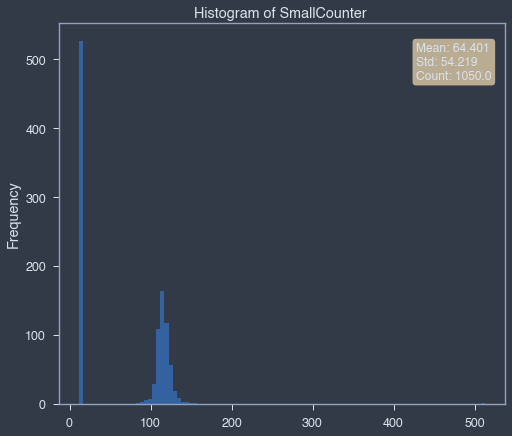

In [74]:
mdfo.getHistogram("SmallCounter",nbins=100)

The number of events hitting the small counter was 1050. This means that $\%$

As evident from the plot above, each muon hit can be classified into two collective bins: *below 20* and *greater than or equal to 20*. We continue the analysis with the latter class of hits.

In [127]:
mdfo.keepEvents("SmallCounter",20,">")

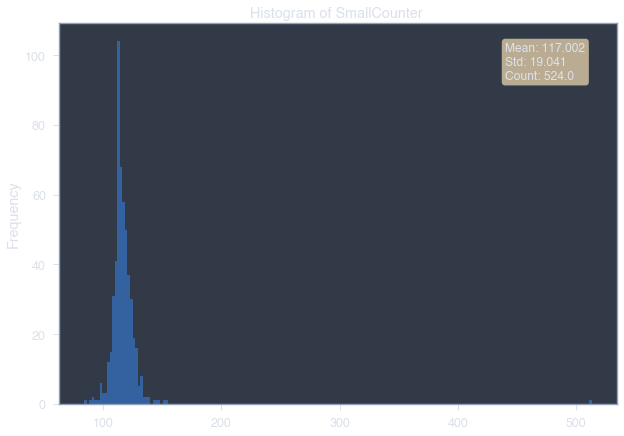

In [76]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]
mdfo.getHistogram("SmallCounter")

There is one muon event that an extreme value - $500+$. We proceed after getting rid of that event.

In [128]:
mdfo.keepEvents("SmallCounter",200,"<")

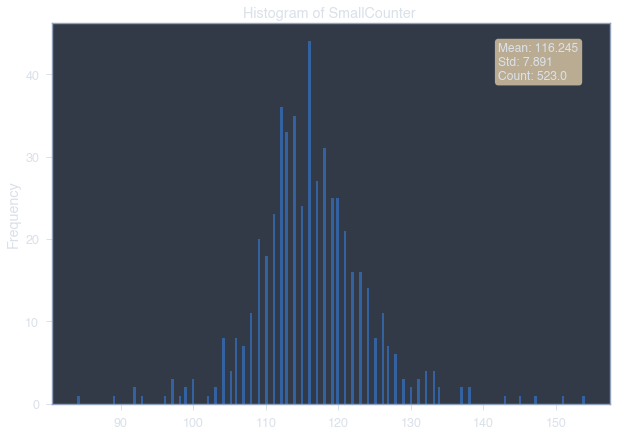

In [78]:
mdfo.getHistogram("SmallCounter")

In [79]:
mdf = mdfo.events_df

## Looking at the Z angle distribution

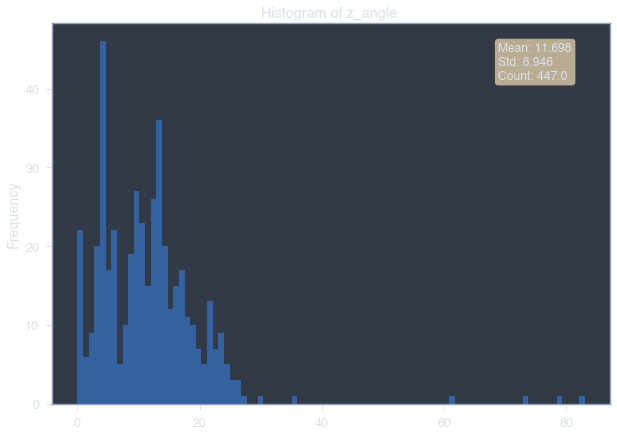

In [80]:
r1 = 0
r2 = 90
bins = 90

mdfo.getHistogram("z_angle",nbins=90)

The angular distribution has now cleaned up a lot and is in line with the distribution from Monte Carlo.

## Lookinat at X Angle Distributions

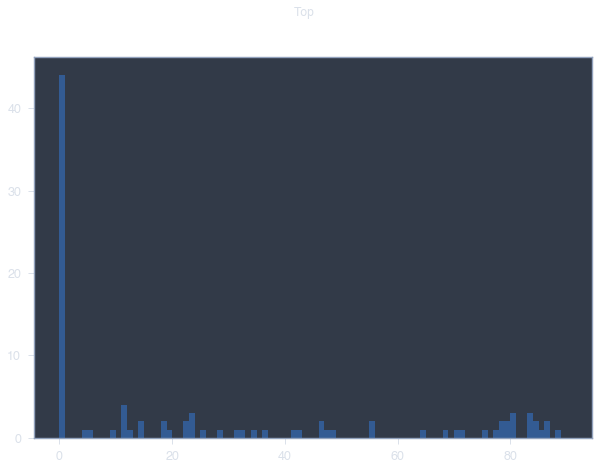

In [81]:
plt.suptitle("Top")
plt.hist(mdf['theta_x1'],alpha=0.6,range=(r1,r2), bins= bins)
plt.show()

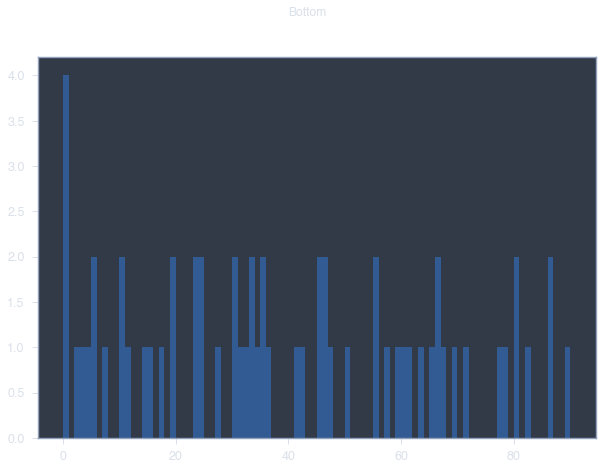

In [82]:
plt.suptitle("Bottom")
plt.hist(mdf['theta_x2'],alpha=0.6,range=(r1,r2), bins= bins)
plt.show()

## Looking at Y Angle Distribution

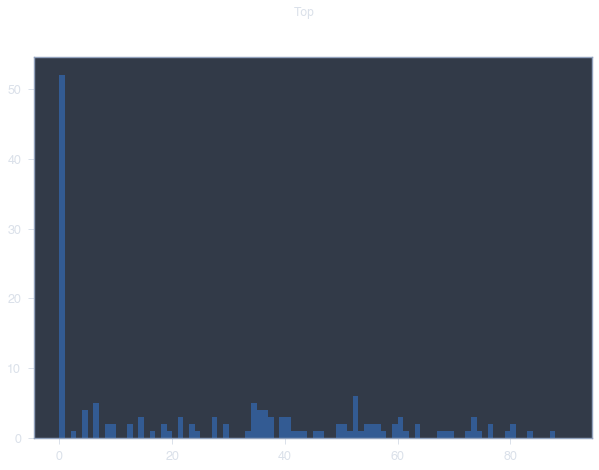

In [83]:
plt.suptitle("Top")
plt.hist(mdf['theta_y1'],alpha=0.6,range=(r1,r2), bins= bins)
plt.show()

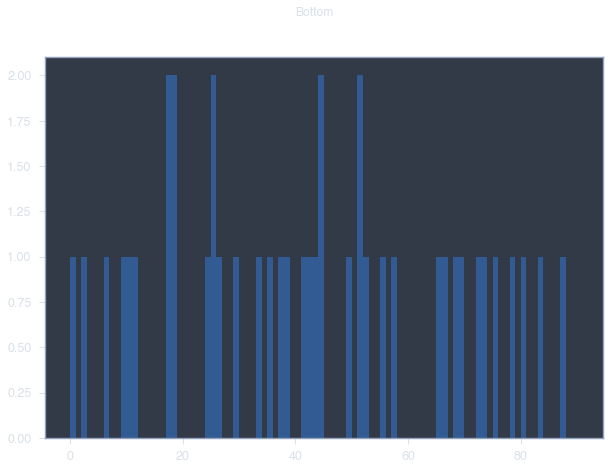

In [84]:
plt.suptitle("Bottom")
plt.hist(mdf['theta_y2'],alpha=0.6,range=(r1,r2), bins= bins)
plt.show()

## Projecting onto the plane of interest

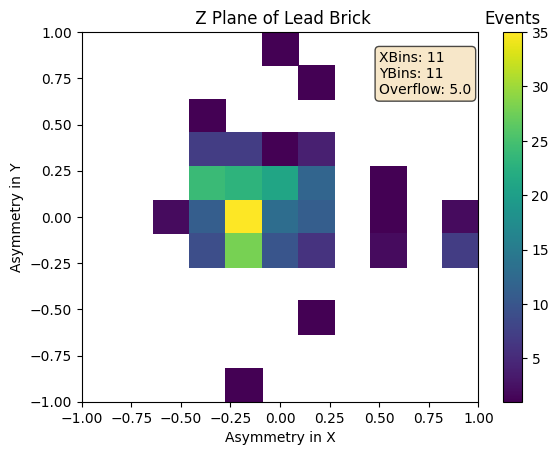

In [16]:
mdfo.get2DTomogram(reload=False)

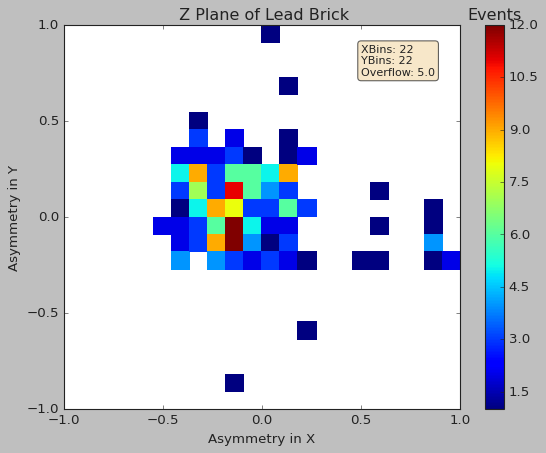

In [114]:
mdfo.get2DTomogram(nbins=22, reload=False)

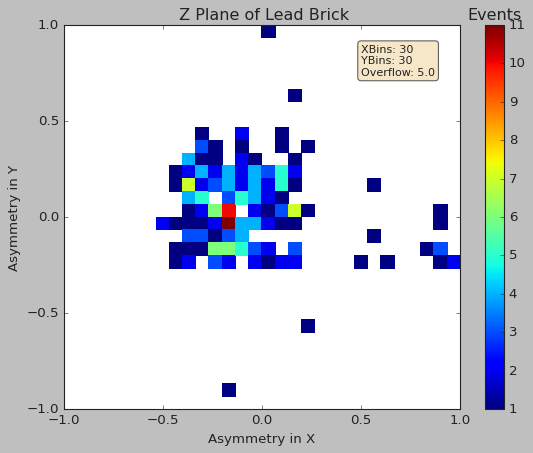

In [111]:
mdfo.get2DTomogram(nbins=30, reload=False)

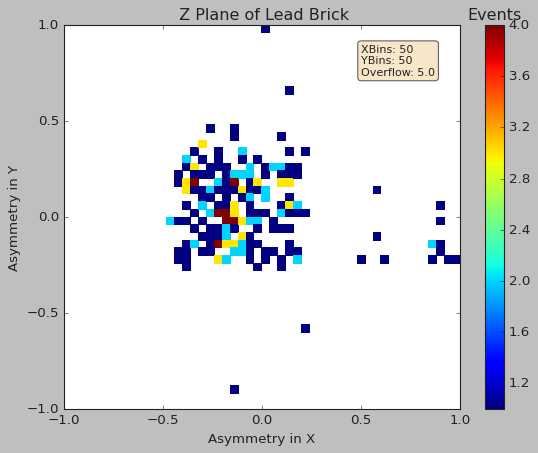

In [112]:
mdfo.get2DTomogram(nbins=50, reload=False)

At even higher binning.

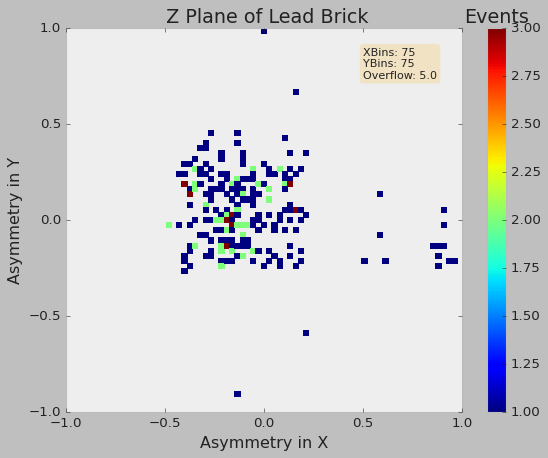

In [117]:
mdfo.get2DTomogram(nbins=75, reload=False)

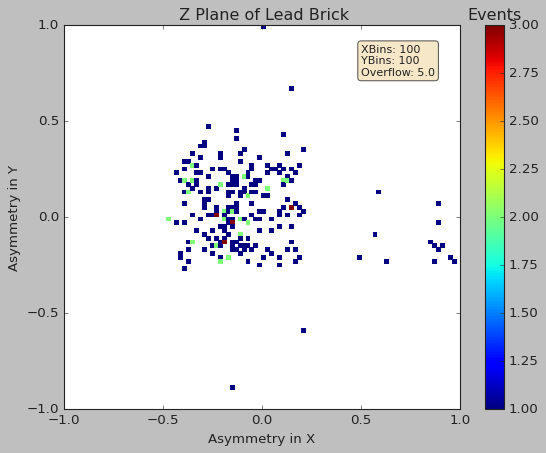

In [110]:
mdfo.get2DTomogram(nbins=100, reload=False)

## Analyzing the Asymmetry Plots

The asymmetry plots with the cuts made.

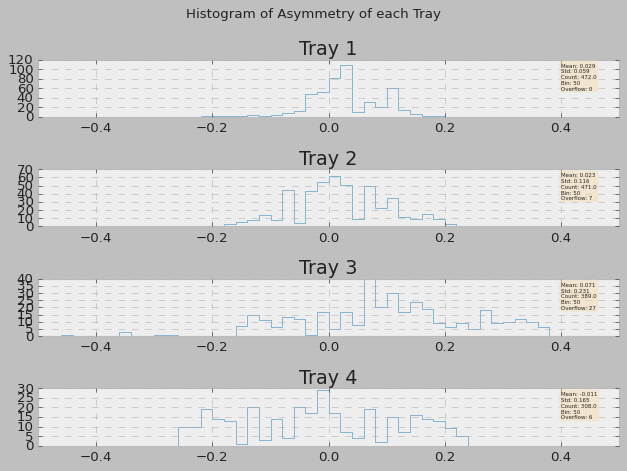

In [129]:
mdfo.getAsymmetry1DPlots()

The asymmetry plots default with no cuts and all events.

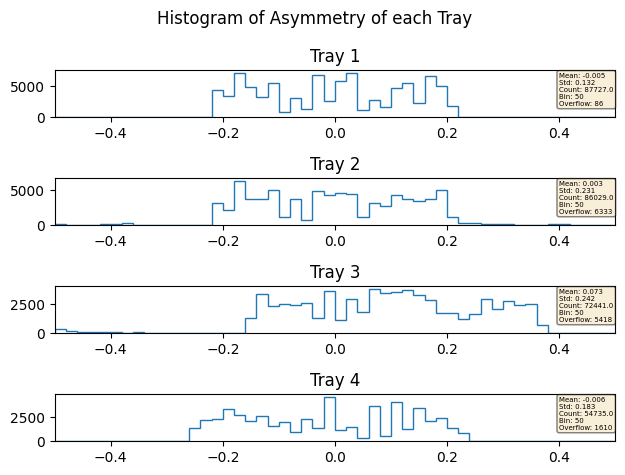

In [32]:
mdfo.reload()
mdfo.getAsymmetry1DPlots()

Cutting the plots will all events but cut at $-0.1 \text{ to } 0.1$

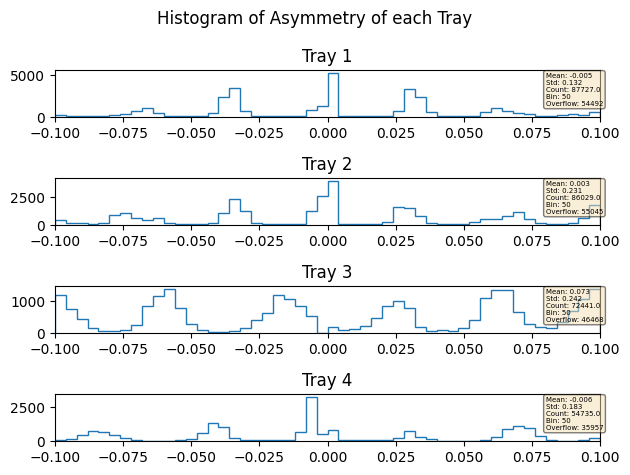

In [25]:
mdfo.getAsymmetry1DPlots(xmin=-0.1,xmax=0.1)

## Calculating the maximum angle

In [90]:
phys = 2 #m
d_asym = (1 / (0.55 / 0.5)) * (phys/2)
asymT1 = 0.1
asymT2 = 0.1


max_angle = np.sqrt((asymT1**2 + asymT2**2) / d_asym) * (360 / np.pi)
max_angle

16.996674933675514

## Using events that only trigger middle three channels on Tray 1

In [64]:
mdfo.reload()
mdfo.keepEvents("asymL1",-0.05,">=")
mdfo.keepEvents("asymL1",0.075,"<=")

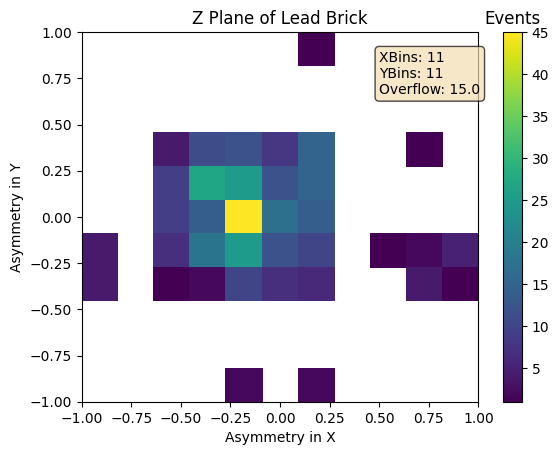

In [75]:
xmin = -1
xmax = 1
ymin = -1
ymax = 1
bins = 11
t = mdfo.getTValue()
xx = mdfo.x(t)
yy = mdfo.y(t)
mdfo.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "Asymmetry in X",
                    "Asymmetry in Y",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

## Using events that have Zenith angle less than 2 degrees

In [66]:
def getPhysicalUnits(asym):
    return (0.55/0.5)*asym*100 # cm

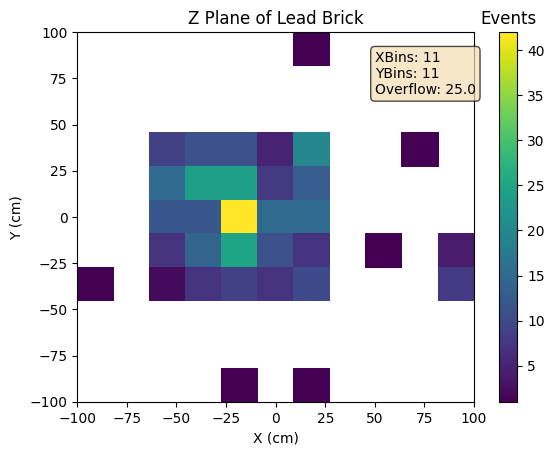

In [73]:
mdfo.reload()
mdfo.keepEvents("z_angle", 2, "<=")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 11
t = mdfo.getTValue()
xx = getPhysicalUnits(mdfo.x(t))
yy = getPhysicalUnits(mdfo.y(t))

mdfo.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

## Using Events that have the SmallCounter TDC > 20

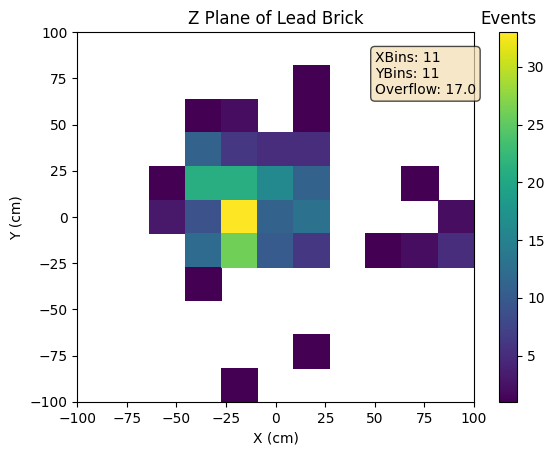

In [66]:
mdfo.reload()
mdfo.keepEvents("SmallCounter", 20, ">=")
mdfo.keepEvents("SmallCounter", 200, "<")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 11
t = mdfo.getTValue()
xx = getPhysicalUnits(mdfo.x(t))
yy = getPhysicalUnits(mdfo.y(t))

mdfo.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

## Using Events that are 4by4

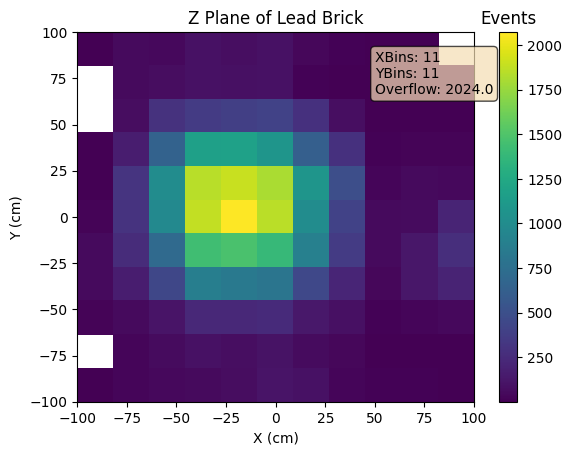

In [77]:
mdfo.reload()
mdfo.keep4by4Events()

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 11
t = mdfo.getTValue()
xx = getPhysicalUnits(mdfo.x(t))
yy = getPhysicalUnits(mdfo.y(t))

mdfo.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

## Using  Events that are 4 by 4 and Small Counter > 20

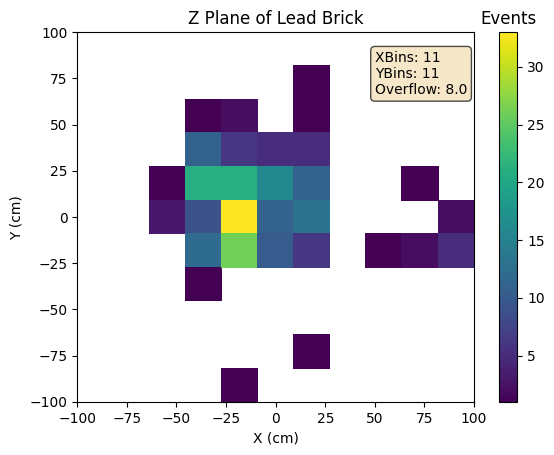

In [86]:
mdfo.reload()
mdfo.keep4by4Events()
mdfo.keepEvents("SmallCounter", 20, ">=")
mdfo.keepEvents("SmallCounter", 200, "<")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 11
t = mdfo.getTValue()
xx = getPhysicalUnits(mdfo.x(t))
yy = getPhysicalUnits(mdfo.y(t))

mdfo.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

## Using  Events that are 4 by 4 and Small Counter > 20 and Z angle < 2

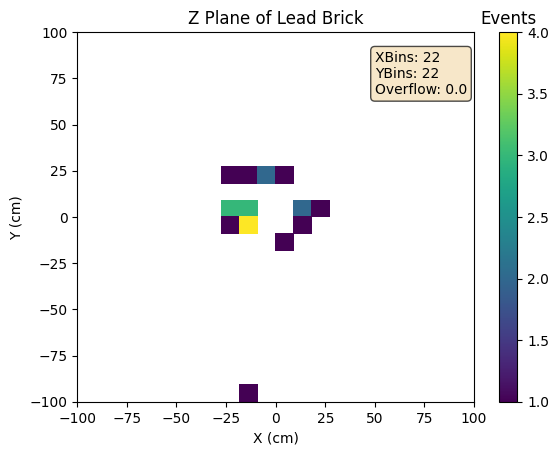

In [94]:
mdfo.reload()
mdfo.keep4by4Events()
mdfo.keepEvents("SmallCounter", 20, ">=")
mdfo.keepEvents("SmallCounter", 200, "<")
mdfo.keepEvents("z_angle", 2, "<=")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 22
t = mdfo.getTValue()
xx = getPhysicalUnits(mdfo.x(t))
yy = getPhysicalUnits(mdfo.y(t))

mdfo.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

## Run 100 (150k events) change of bar location

In [55]:
from MuonDataFrame import *
file1 = "processed_data/events_data_frame_100.h5"
mdfo2 = MuonDataFrame(file1, isNew=False, d1="last") #Muon Data Frame Object 
mdf2 = mdfo2.events_df

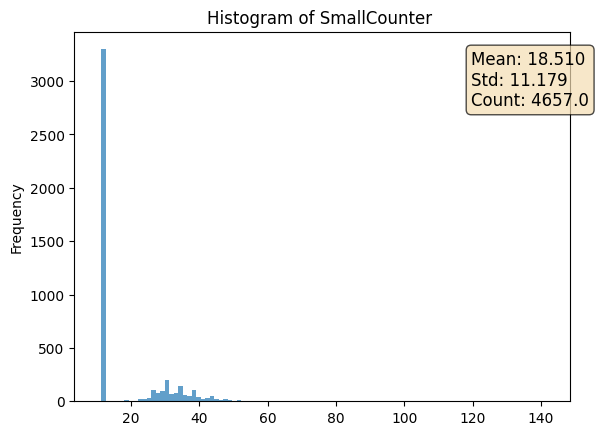

In [56]:
mdfo2.getHistogram("SmallCounter",nbins=100)

In [57]:
mdfo2.keepEvents("SmallCounter",18,">")

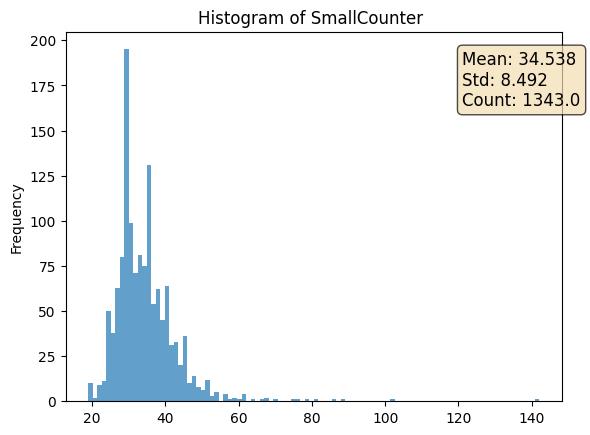

In [58]:
mdfo2.getHistogram("SmallCounter",nbins=100)

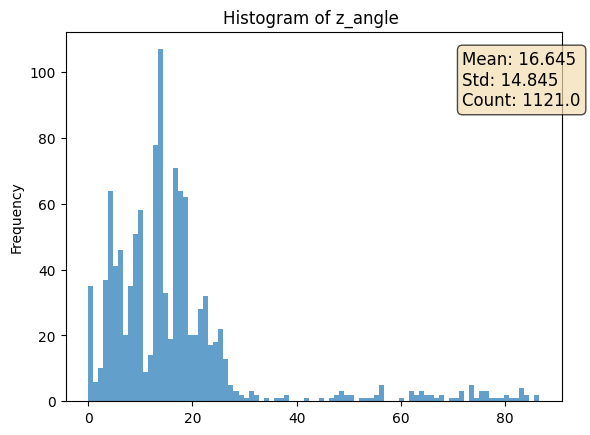

In [59]:
r1 = 0
r2 = 90
bins = 90

mdfo2.getHistogram("z_angle",nbins=90)

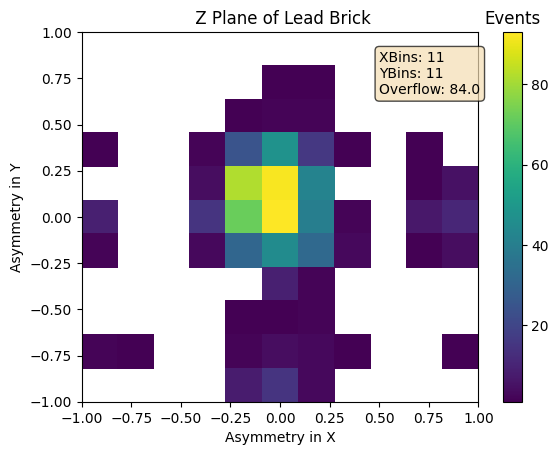

In [60]:
mdfo2.get2DTomogram(reload=False)

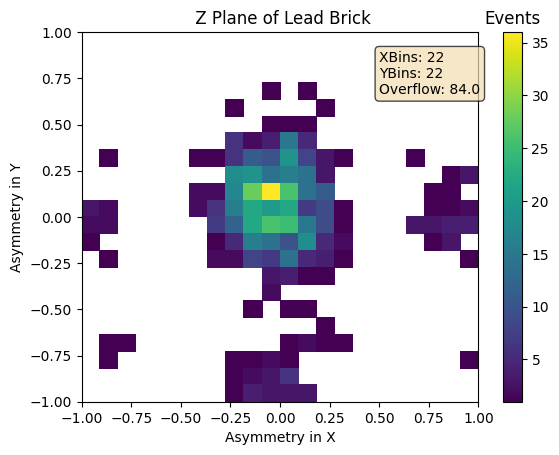

In [61]:
mdfo2.get2DTomogram(reload=False, nbins=22)

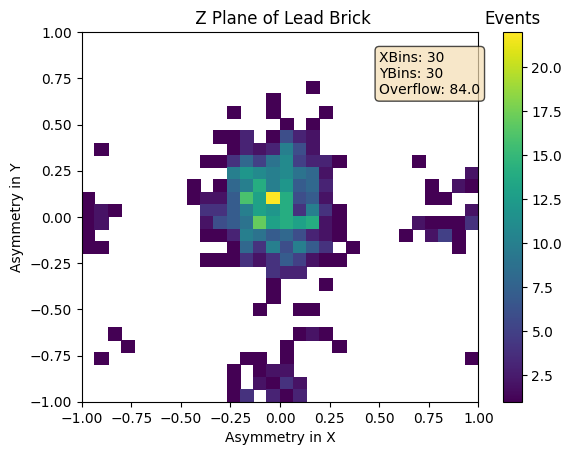

In [62]:
mdfo2.get2DTomogram(reload=False, nbins=30)

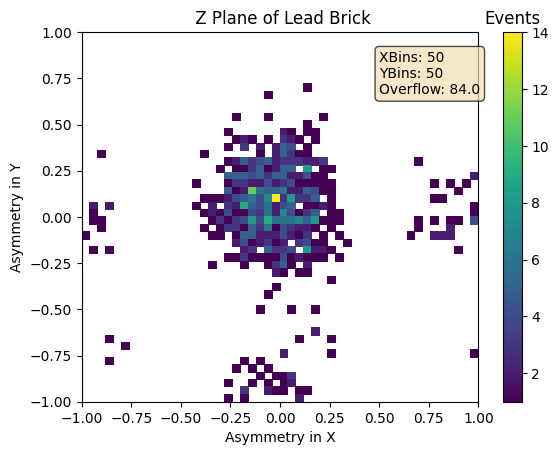

In [63]:
mdfo2.get2DTomogram(reload=False, nbins=50)

## Using events that only trigger middle three channels on Tray 1

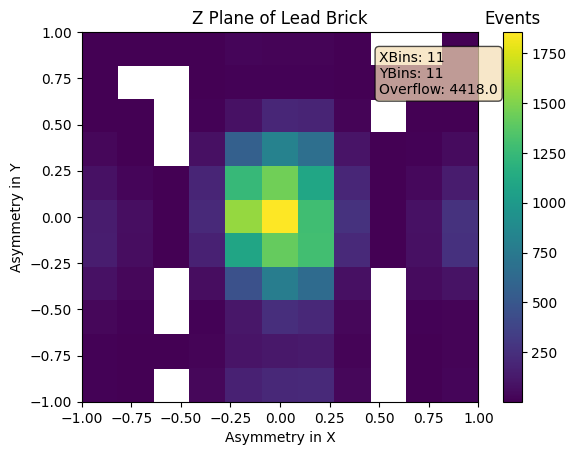

In [64]:
mdfo2.reload()
mdfo2.keepEvents("asymL1",-0.05,">=")
mdfo2.keepEvents("asymL1",0.075,"<=")

xmin = -1
xmax = 1
ymin = -1
ymax = 1
bins = 11
t = mdfo2.getTValue()
xx = mdfo2.x(t)
yy = mdfo2.y(t)
mdfo2.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "Asymmetry in X",
                    "Asymmetry in Y",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

## Using events that have Zenith angle less than 2 degrees

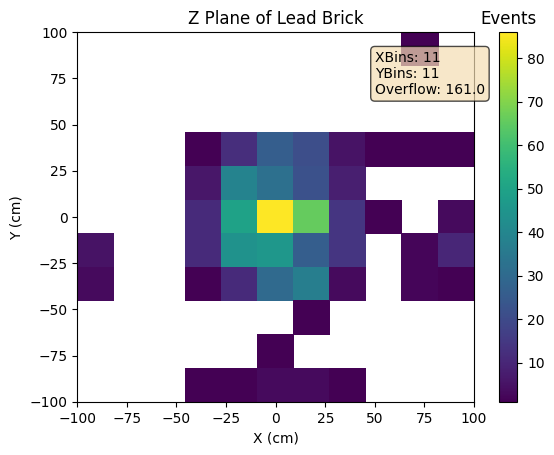

In [65]:
def getPhysicalUnits(asym):
    return (0.55/0.5)*asym*100 # cm

mdfo2.reload()
mdfo2.keepEvents("z_angle", 2, "<=")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 11
t = mdfo2.getTValue()
xx = getPhysicalUnits(mdfo2.x(t))
yy = getPhysicalUnits(mdfo2.y(t))

mdfo2.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)


## Using Events that have the SmallCounter TDC > 20



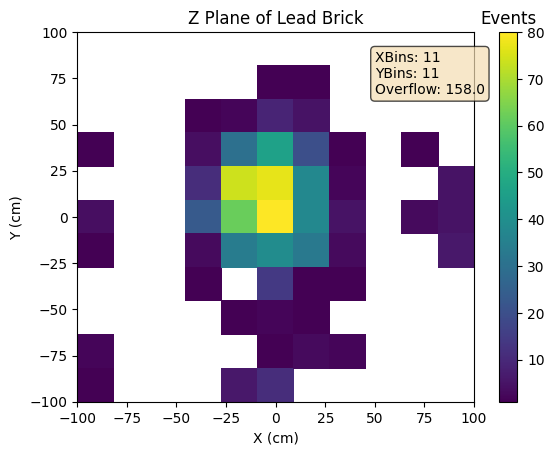

In [38]:

mdfo2.reload()
mdfo2.keepEvents("SmallCounter", 20, ">=")
mdfo2.keepEvents("SmallCounter", 200, "<")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 11
t = mdfo2.getTValue()
xx = getPhysicalUnits(mdfo2.x(t))
yy = getPhysicalUnits(mdfo2.y(t))

mdfo2.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

## Using Events that are 4by4



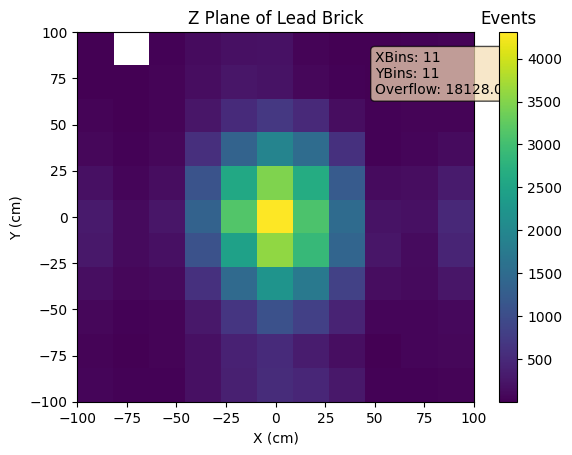

In [39]:

mdfo2.reload()
mdfo2.keep4by4Events()

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 11
t = mdfo2.getTValue()
xx = getPhysicalUnits(mdfo2.x(t))
yy = getPhysicalUnits(mdfo2.y(t))

mdfo2.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

## Using  Events that are 4 by 4 and Small Counter > 20



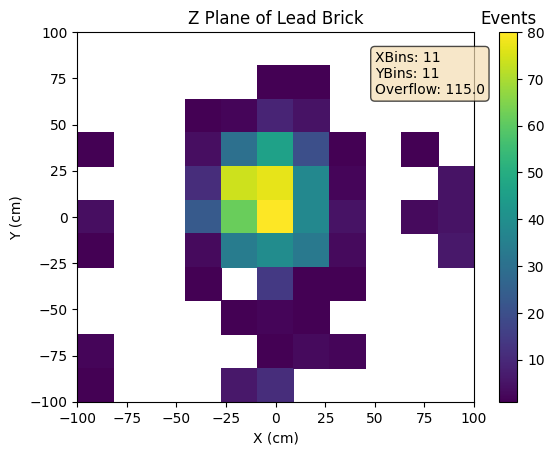

In [40]:
mdfo2.reload()
mdfo2.keep4by4Events()
mdfo2.keepEvents("SmallCounter", 20, ">=")
mdfo2.keepEvents("SmallCounter", 200, "<")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 11
t = mdfo2.getTValue()
xx = getPhysicalUnits(mdfo2.x(t))
yy = getPhysicalUnits(mdfo2.y(t))

mdfo2.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)



## Using  Events that are 4 by 4 and Small Counter > 20 and Z angle < 2


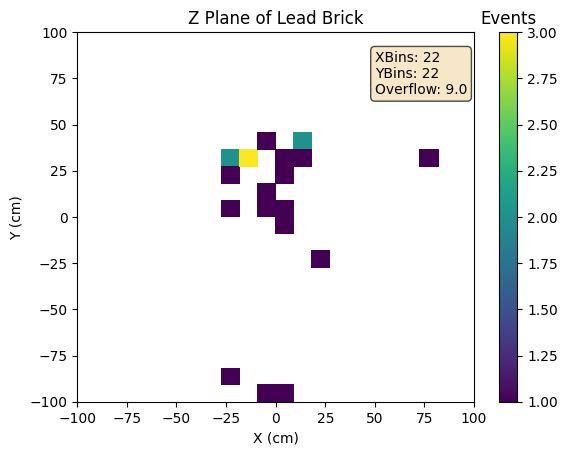

In [76]:
mdfo2.reload()
mdfo2.keep4by4Events()
mdfo2.keepEvents("SmallCounter", 20, ">=")
mdfo2.keepEvents("SmallCounter", 200, "<")
mdfo2.keepEvents("z_angle", 2, "<=")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 22
t = mdfo2.getTValue()
xx = getPhysicalUnits(mdfo2.x(t))
yy = getPhysicalUnits(mdfo2.y(t))

mdfo2.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

# Comparison of two runs

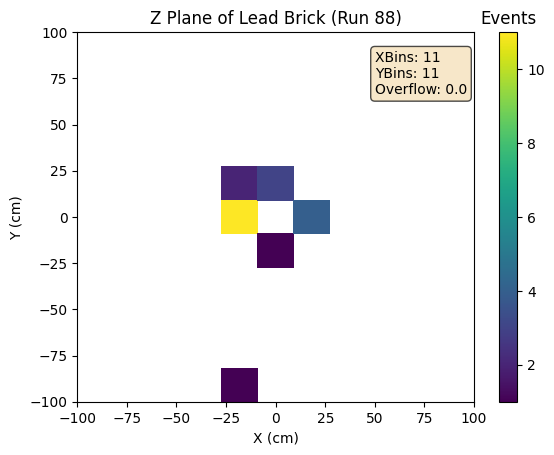

In [69]:
mdfo = MuonDataFrame("processed_data/events_data_frame_88.h5", False, "last")

mdfo.keep4by4Events()
mdfo.keepEvents("SmallCounter", 20, ">=")
mdfo.keepEvents("SmallCounter", 200, "<")
mdfo.keepEvents("z_angle", 2, "<=")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 11
t = mdfo.getTValue()
xx = getPhysicalUnits(mdfo.x(t))
yy = getPhysicalUnits(mdfo.y(t))

mdfo.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick (Run 88)",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

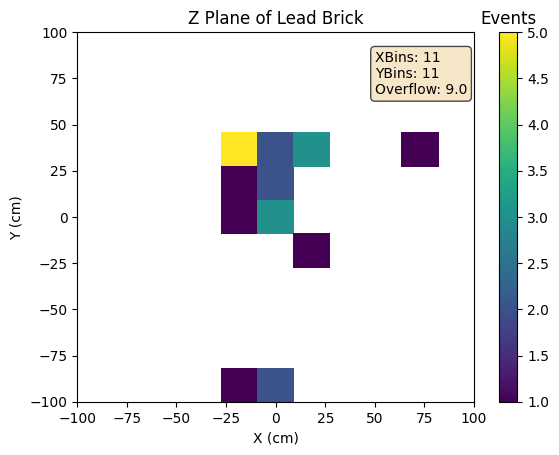

In [79]:
mdfo2 = MuonDataFrame("processed_data/events_data_frame_100.h5", False, "last")


mdfo2.keep4by4Events()
mdfo2.keepEvents("SmallCounter", 20, ">=")
mdfo2.keepEvents("SmallCounter", 200, "<")
mdfo2.keepEvents("z_angle", 2, "<=")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 11
t = mdfo2.getTValue()
xx = getPhysicalUnits(mdfo2.x(t))
yy = getPhysicalUnits(mdfo2.y(t))

mdfo2.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

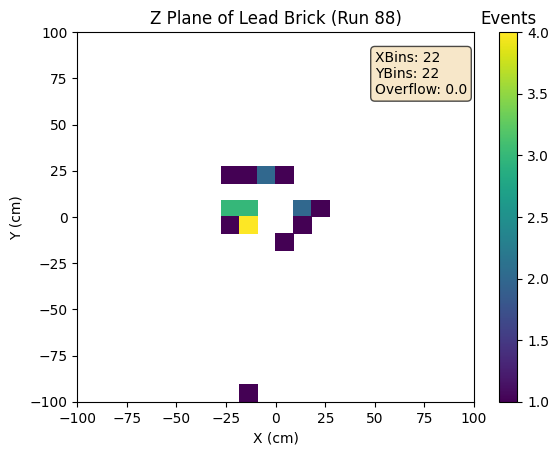

In [86]:
mdfo = MuonDataFrame("processed_data/events_data_frame_88.h5", False, "last")

mdfo.keep4by4Events()
mdfo.keepEvents("SmallCounter", 20, ">=")
mdfo.keepEvents("SmallCounter", 200, "<")
mdfo.keepEvents("z_angle", 2, "<=")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 22
t = mdfo.getTValue()
xx = getPhysicalUnits(mdfo.x(t))
yy = getPhysicalUnits(mdfo.y(t))

mdfo.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick (Run 88)",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

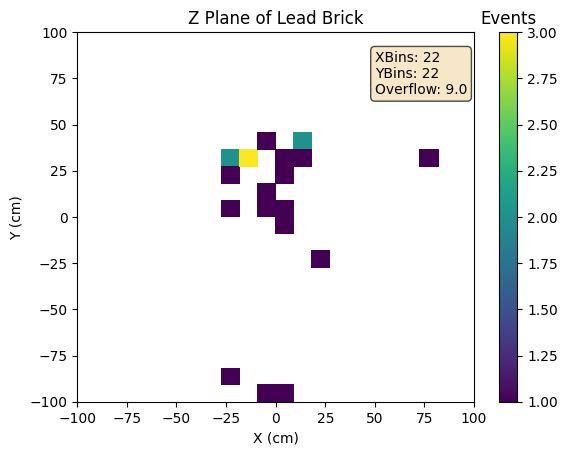

In [85]:
mdfo2 = MuonDataFrame("processed_data/events_data_frame_100.h5", False, "last")


mdfo2.keep4by4Events()
mdfo2.keepEvents("SmallCounter", 20, ">=")
mdfo2.keepEvents("SmallCounter", 200, "<")
mdfo2.keepEvents("z_angle", 2, "<=")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 22
t = mdfo2.getTValue()
xx = getPhysicalUnits(mdfo2.x(t))
yy = getPhysicalUnits(mdfo2.y(t))

mdfo2.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

### Run88

![as](small2.jpeg)

### Run100

![as2](small3.jpeg)

# Conclusion

The shift of the Small Counter **may** have been detected.

Not super confident in conclusion as the statistics are really low. Need to have another run with different position to ensure the accuracy. 

## Run 101

<img src="topSma.jpeg" alt="Girl in a jacket" width="200" height="200">


This run was taken in low light conditions.

In [4]:
from MuonDataFrame import *
mdfo3 = MuonDataFrame("processed_data/events_data_frame_101.h5", False, "last")
mdf3 = mdfo3.events_df

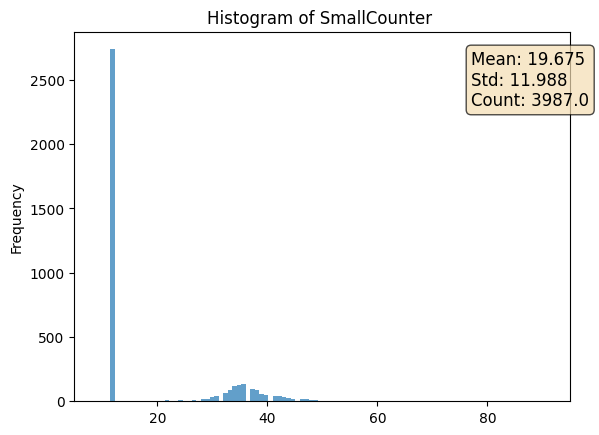

In [6]:
mdfo3.getHistogram("SmallCounter",nbins=100)

### Observation 1: It doesn't seem like the cause of the low TDC spike is light leak

In [7]:
mdfo3.keepEvents("SmallCounter", 18, ">=")

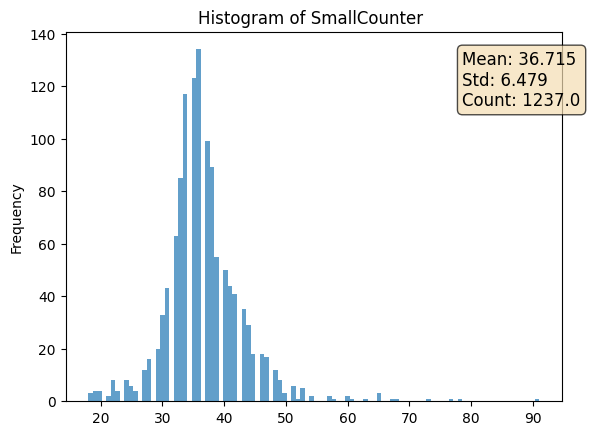

In [8]:
mdfo3.getHistogram("SmallCounter",nbins=100)

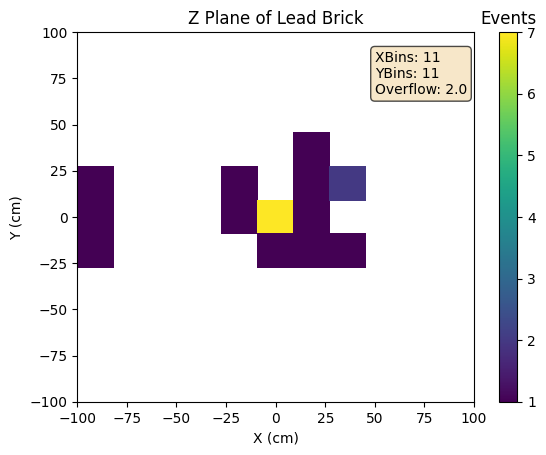

In [35]:
mdfo3 = MuonDataFrame("processed_data/events_data_frame_101.h5", False, "last")

mdfo3.keep4by4Events()
mdfo3.keepEvents("SmallCounter", 20, ">=")
mdfo3.keepEvents("SmallCounter", 200, "<")
mdfo3.keepEvents("z_angle", 2, "<=")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 11
t = mdfo3.getTValue()
xx = getPhysicalUnits(mdfo3.x(t))
yy = getPhysicalUnits(mdfo3.y(t))

mdfo3.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

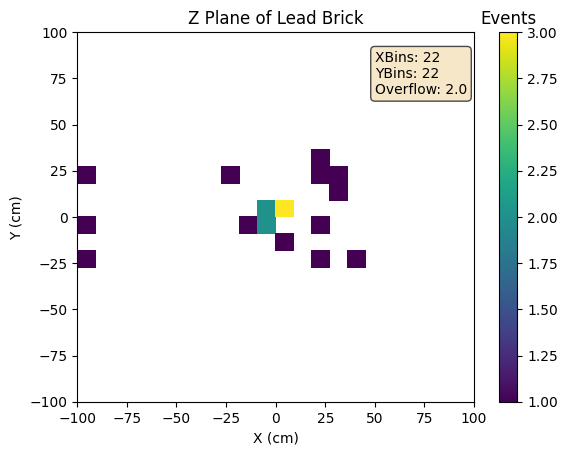

In [36]:
mdfo3 = MuonDataFrame("processed_data/events_data_frame_101.h5", False, "last")

mdfo3.keep4by4Events()
mdfo3.keepEvents("SmallCounter", 20, ">=")
mdfo3.keepEvents("SmallCounter", 200, "<")
mdfo3.keepEvents("z_angle", 2, "<=")

xmin = -100
xmax = 100
ymin = -100
ymax = 100
bins = 22
t = mdfo3.getTValue()
xx = getPhysicalUnits(mdfo3.x(t))
yy = getPhysicalUnits(mdfo3.y(t))

mdfo3.get2DHistogram(xx,
                    yy,
                    "Z Plane of Lead Brick",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

## Comparing with previous runs

At 11 bins

<table width="100%" border="0">
  <tr>    
  <td><img src="run88_22.png" alt="" align="left" /></td>
  <td><img src="run100_22.png" alt="" align="center" /></td>
  <td><img src="run101_11.png" alt="" align="right"/></td>
  </tr>
</table>

At 22 bins

<table width="100%" border="0">
  <tr>    
  <td><img src="run88_11.png" alt="" align="left" /></td>
  <td><img src="run100_11.png" alt="" align="center" /></td>
  <td><img src="run101_22.png" alt="" align="right"/></td>
  </tr>
</table>

# Conclusions:

At 11 binning, the figures clearly show that the system does pick up the shifting of the scintillator plate given the constraints of angles less than 2 degrees. At higher binning, the trend is still strong and positive but less conclusive. Regardless, higher statistics runs are needed to be completely sure of all the results.